In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
psy_data=pd.read_csv(r'D:\clean R4\psychometric_scaled.csv')

In [3]:
psy_data.head()

,employee_name,user_id,O,C,E,A,N
0,Calvin Edan Love,CEL0561,0.20,0.222857,0.205714,0.11875,0.133333
1,Christine Reagan Deleon,CRD0624,0.13,0.125714,0.097143,0.24375,0.106667
2,Jade Felicia Caldwell,JFC0557,0.11,0.091429,0.131429,0.25000,0.110000
3,Aquila Stewart Dejesus,ASD0577,0.20,0.274286,0.205714,0.08750,0.123333
4,Micah Abdul Rojas,MAR0955,0.18,0.251429,0.131429,0.27500,0.083333


## EDA

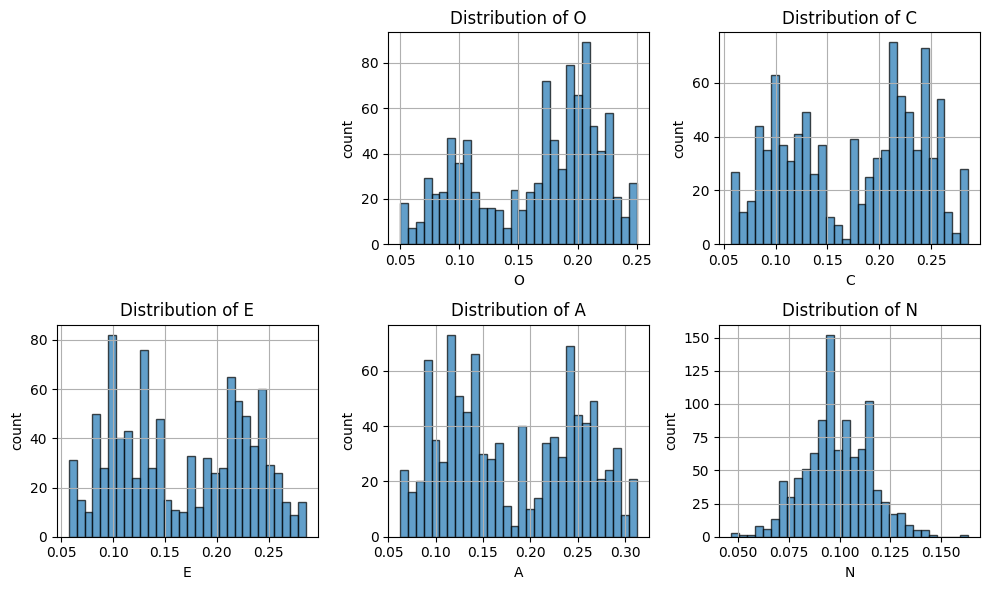

In [5]:
import matplotlib.pyplot as plt 

traits=['O', 'C', 'E', 'A', 'N']
plt.figure(figsize=(10, 6))

for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i + 1)
    psy_data[trait].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {trait}')
    plt.xlabel(trait)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

# correlation between traits

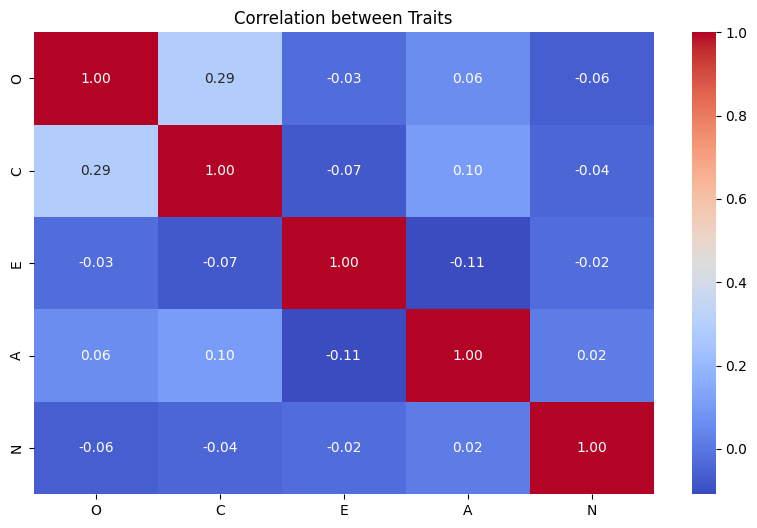

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(psy_data[traits].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Traits')
plt.show()

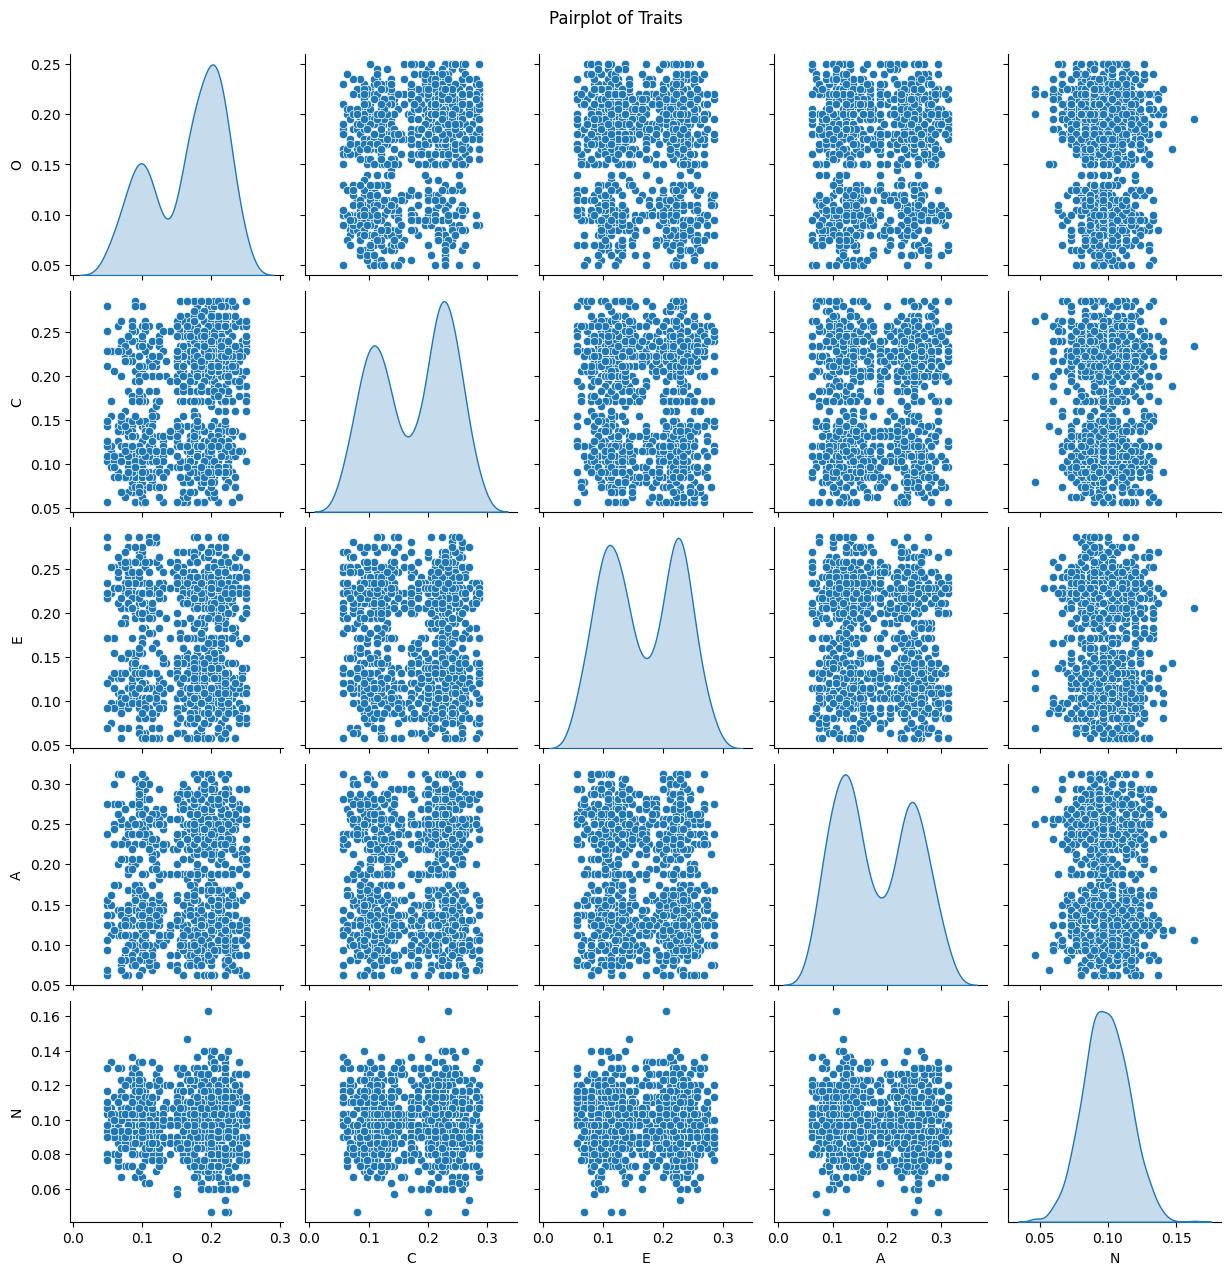

In [7]:
sns.pairplot(psy_data[traits], diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Traits', y=1.02)
plt.show()

# Aggregation per user

In [9]:
user_agg = psy_data.rename(columns={'user_id': 'user'})
print(user_agg.head())

             employee_name     user     O         C         E        A  \
0         Calvin Edan Love  CEL0561  0.20  0.222857  0.205714  0.11875   
1  Christine Reagan Deleon  CRD0624  0.13  0.125714  0.097143  0.24375   
2    Jade Felicia Caldwell  JFC0557  0.11  0.091429  0.131429  0.25000   
3   Aquila Stewart Dejesus  ASD0577  0.20  0.274286  0.205714  0.08750   
4        Micah Abdul Rojas  MAR0955  0.18  0.251429  0.131429  0.27500   

          N  
0  0.133333  
1  0.106667  
2  0.110000  
3  0.123333  
4  0.083333  


# overall trait summary

In [10]:
trait_summary = psy_data[traits].agg(['mean', 'std', 'min', 'max', 'median'])
print(trait_summary)

               O         C         E         A         N
mean    0.165865  0.175160  0.166840  0.180131  0.098693
std     0.053210  0.064523  0.062608  0.069818  0.016462
min     0.050000  0.057143  0.057143  0.062500  0.046667
max     0.250000  0.285714  0.285714  0.312500  0.163333
median  0.180000  0.188571  0.160000  0.168750  0.096667


In [11]:
psy_data['dominating_trait'] = psy_data[traits].idxmax(axis=1)
dominat_counts = psy_data['dominating_trait'].value_counts()
print(dominat_counts)

dominating_trait
A    358
C    261
E    252
O    125
N      4
Name: count, dtype: int64


In [12]:
trait_summary.to_csv('trait_summary.csv')
psy_data.to_csv('psy_data_aggregated.csv', index=False)


In [13]:
trait_summ=pd.read_csv(r'D:\clean R4\trait_summary.csv')
psy_data_agg=pd.read_csv(r'D:\clean R4\psy_data_aggregated.csv')

In [14]:
trait_summary.head()

,O,C,E,A,N
mean,0.165865,0.175160,0.166840,0.180131,0.098693
std,0.053210,0.064523,0.062608,0.069818,0.016462
min,0.050000,0.057143,0.057143,0.062500,0.046667
max,0.250000,0.285714,0.285714,0.312500,0.163333
median,0.180000,0.188571,0.160000,0.168750,0.096667


In [15]:
psy_data_agg.head()

,employee_name,user_id,O,C,E,A,N,dominating_trait
0,Calvin Edan Love,CEL0561,0.20,0.222857,0.205714,0.11875,0.133333,C
1,Christine Reagan Deleon,CRD0624,0.13,0.125714,0.097143,0.24375,0.106667,A
2,Jade Felicia Caldwell,JFC0557,0.11,0.091429,0.131429,0.25000,0.110000,A
3,Aquila Stewart Dejesus,ASD0577,0.20,0.274286,0.205714,0.08750,0.123333,C
4,Micah Abdul Rojas,MAR0955,0.18,0.251429,0.131429,0.27500,0.083333,A


In [16]:
mapping = {"O":1, "C":2, "E":3, "A":4, "N":5}
psy_data_agg['dominating_trait'] = psy_data_agg['dominating_trait'].map(mapping)

psy_data_agg.to_csv('psy_data_aggregated_mapped.csv', index=False)


In [17]:
df=pd.read_csv(r'D:\clean R4\psy_data_aggregated_mapped.csv')

In [18]:
df.head()

,employee_name,user_id,O,C,E,A,N,dominating_trait
0,Calvin Edan Love,CEL0561,0.20,0.222857,0.205714,0.11875,0.133333,2
1,Christine Reagan Deleon,CRD0624,0.13,0.125714,0.097143,0.24375,0.106667,4
2,Jade Felicia Caldwell,JFC0557,0.11,0.091429,0.131429,0.25000,0.110000,4
3,Aquila Stewart Dejesus,ASD0577,0.20,0.274286,0.205714,0.08750,0.123333,2
4,Micah Abdul Rojas,MAR0955,0.18,0.251429,0.131429,0.27500,0.083333,4
